In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Lma-amQu0WjV-PCAr2LOe377H99z4BoR')

Separando os dados de Teste( sem Otimização)


In [ ]:
# As features numéricas já estão em uma mesma escala e as categóricas já passaram pelo one-hot encoding
from sklearn.model_selection import train_test_split

X = df.drop('y', axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Random Forest Classifier:
Acurácia: 0.90
Precisão: 0.59
Recall: 0.37
Roc_Auc: 0.91
F1: 0.45
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      7061
         1.0       0.59      0.37      0.45       889

    accuracy                           0.90      7950
   macro avg       0.76      0.67      0.70      7950
weighted avg       0.89      0.90      0.89      7950


matriz de confusão


<Axes: >

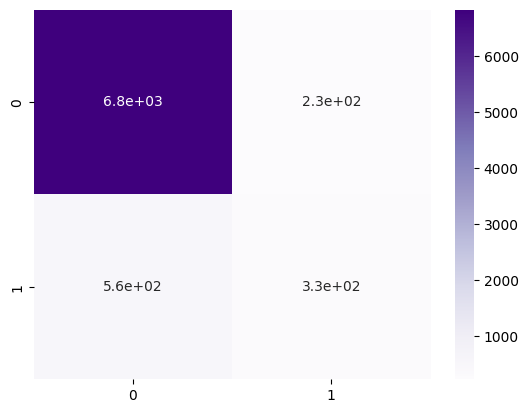

In [ ]:
# Importar e armazenar modelo
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
# Treinar modelo
rf.fit(X_train, y_train)
# Fazer predição
y_pred_rf = rf.predict(X_test)
# Avaliando acurácia, precisão, recall, área abaixo da curva ROC, f1
y_pred_rf_proba = rf.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_proba)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Classifier:")
print(f'Acurácia: {rf_accuracy:.2f}')
print(f'Precisão: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'Roc_Auc: {rf_roc_auc:.2f}')
print(f'F1: {rf_f1:.2f}')
print(classification_report(y_test, y_pred_rf))

print("\nmatriz de confusão")
matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix, annot=True, cmap='Purples')

Treinando a Random Forest Com Otimização


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.4 MB/s eta 0:00:00
Random Forest Classifier (Bayesian Optimization):
Acurácia: 0.86
Precisão: 0.44
Recall: 0.74
Roc_Auc: 0.91
F1: 0.55
              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      7061
         1.0       0.44      0.74      0.55       889

    accuracy                           0.86      7950
   macro avg       0.70      0.81      0.74      7950
weighted avg       0.91      0.86      0.88      7950


Matriz de confusão


<Axes: >

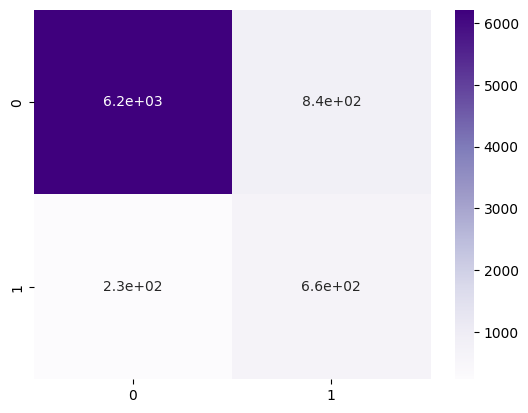

In [ ]:
!pip install scikit-optimize
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from skopt import BayesSearchCV



df = pd.read_csv('https://drive.google.com/uc?export=download&id=1Lma-amQu0WjV-PCAr2LOe377H99z4BoR')

X = df.drop('y', axis=1)
y = df['y']


# Dividir o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTEENN(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Definir o modelo
rf = RandomForestClassifier(random_state=42)

# Definir a pesquisa de hiperparâmetros com otimização Bayesiana
param_dist = {
    'n_estimators': (10, 500),
    'max_depth': (1, 50),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20),
    'max_features': (0.1, 0.99)
}

# Definir o BayesSearchCV
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=param_dist,
    n_iter=32,
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Treinar o modelo com cross-validation e otimização Bayesiana
opt.fit(X_train, y_train)

# Fazer predição
y_pred_rf = opt.predict(X_test)

# Avaliando acurácia, precisão, recall, área abaixo da curva ROC, f1
y_pred_rf_proba = opt.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_proba)
rf_f1 = f1_score(y_test, y_pred_rf)

print("Random Forest Classifier (Bayesian Optimization):")
print(f'Acurácia: {rf_accuracy:.2f}')
print(f'Precisão: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'Roc_Auc: {rf_roc_auc:.2f}')
print(f'F1: {rf_f1:.2f}')
print(classification_report(y_test, y_pred_rf))

print("\nMatriz de confusão")
matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matrix, annot=True, cmap='Purples')

In [ ]:
# Imprimir os melhores hiperparâmetros
print("Melhores hiperparâmetros encontrados:")
print(opt.best_params_)
#Melhores hiperparâmetros encontrados:
#OrderedDict([('max_depth', 50), ('max_features', 0.1), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])


Melhores hiperparâmetros encontrados:
OrderedDict([('max_depth', 50), ('max_features', 0.1), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 500)])
